## Importing libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('sao-paulo-properties-april-2019.csv')

## Knowing more about our dataset

In [4]:
data.head()

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,District,Negotiation Type,Property Type,Latitude,Longitude
0,930,220,47,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.543138,-46.479486
1,1000,148,45,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.550239,-46.480718
2,1000,100,48,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.542818,-46.485665
3,1000,200,48,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.547171,-46.483014
4,1300,410,55,2,2,1,1,1,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.525025,-46.482436


In [5]:
data.isnull().sum()

Price               0
Condo               0
Size                0
Rooms               0
Toilets             0
Suites              0
Parking             0
Elevator            0
Furnished           0
Swimming Pool       0
New                 0
District            0
Negotiation Type    0
Property Type       0
Latitude            0
Longitude           0
dtype: int64

In [6]:
data.shape

(13640, 16)

In [7]:
data.dtypes

Price                 int64
Condo                 int64
Size                  int64
Rooms                 int64
Toilets               int64
Suites                int64
Parking               int64
Elevator              int64
Furnished             int64
Swimming Pool         int64
New                   int64
District             object
Negotiation Type     object
Property Type        object
Latitude            float64
Longitude           float64
dtype: object

Types of our date looks like ok

In [8]:
# Checking unique values for negotition types
data['Negotiation Type'].unique(), data['Property Type'].unique()

(array(['rent', 'sale'], dtype=object), array(['apartment'], dtype=object))

## In this code we can conclude that in this dataset we only have appartaments for sale or rent in SP.

In [9]:
# We have a good proportions of values between our dataset, this could be nice for us to 
#maybe predict which appartment is on rent or sale,
#or maybe create a different model for prices according to the negotiation type
data['Negotiation Type'].value_counts()

rent    7228
sale    6412
Name: Negotiation Type, dtype: int64

## Data Wrangling

Will try to split our column district into two

In [10]:
# to split data we have to distinguish wich columns we want to split, in our case im splitting District and city
data[['District','City']] = data['District'].str.split('/', expand = True)

In [11]:
data.head()

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,District,Negotiation Type,Property Type,Latitude,Longitude,City
0,930,220,47,2,2,1,1,0,0,0,0,Artur Alvim,rent,apartment,-23.543138,-46.479486,São Paulo
1,1000,148,45,2,2,1,1,0,0,0,0,Artur Alvim,rent,apartment,-23.550239,-46.480718,São Paulo
2,1000,100,48,2,2,1,1,0,0,0,0,Artur Alvim,rent,apartment,-23.542818,-46.485665,São Paulo
3,1000,200,48,2,2,1,1,0,0,0,0,Artur Alvim,rent,apartment,-23.547171,-46.483014,São Paulo
4,1300,410,55,2,2,1,1,1,0,0,0,Artur Alvim,rent,apartment,-23.525025,-46.482436,São Paulo


In [12]:
## Now lets visualize the unique values for city and district
data['District'].unique(), data['City'].unique()

(array(['Artur Alvim', 'Belém', 'Cangaíba', 'Carrão', 'Cidade Líder',
        'Cidade Tiradentes', 'Ermelino Matarazzo', 'Iguatemi',
        'Itaim Paulista', 'Itaquera', 'Jardim Helena', 'José Bonifácio',
        'Lajeado', 'Parque do Carmo', 'Penha', 'Ponte Rasa', 'Sapopemba',
        'São Lucas', 'São Mateus', 'São Miguel', 'São Rafael', 'Tatuapé',
        'Vila Curuçá', 'Vila Formosa', 'Vila Jacuí', 'Vila Matilde',
        'Vila Prudente', 'Cambuci', 'Campo Belo', 'Campo Grande',
        'Campo Limpo', 'Capão Redondo', 'Cidade Ademar', 'Cidade Dutra',
        'Cursino', 'Grajaú', 'Ipiranga', 'Itaim Bibi', 'Jabaquara',
        'Jardim Ângela', 'Jardim Paulista', 'Moema', 'Morumbi', 'Pedreira',
        'Sacomã', 'Santo Amaro', 'Saúde', 'Socorro', 'Vila Andrade',
        'Vila Mariana', 'Vila Sônia', 'Alto de Pinheiros', 'Anhanguera',
        'Brasilândia', 'Butantã', 'Cachoeirinha', 'Freguesia do Ó',
        'Jaguaré', 'Jaraguá', 'Lapa', 'Limão', 'Perdizes', 'Pinheiros',
        'Pir

For here, we have only São Paulo and a bunch of districs.

In [13]:
data.describe()

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,Latitude,Longitude
count,1.364000e+04,13640.000000,13640.000000,13640.000000,13640.000000,13640.000000,13640.000000,13640.000000,13640.000000,13640.00000,13640.000000,13640.000000,13640.000000
mean,2.877378e+05,689.882331,84.373900,2.312023,2.073680,0.980792,1.393182,0.354179,0.146774,0.51217,0.015616,-22.077047,-43.597088
std,5.908214e+05,757.649363,58.435676,0.777461,0.961803,0.834891,0.829932,0.478281,0.353894,0.49987,0.123988,5.866633,11.487288
min,4.800000e+02,0.000000,30.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,-46.749039,-58.364352
25%,1.858750e+03,290.000000,50.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000,-23.594552,-46.681671
50%,8.100000e+03,500.000000,65.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,1.00000,0.000000,-23.552813,-46.637255
75%,3.600000e+05,835.000000,94.000000,3.000000,2.000000,1.000000,2.000000,1.000000,0.000000,1.00000,0.000000,-23.517640,-46.560040
max,1.000000e+07,9500.000000,880.000000,10.000000,8.000000,6.000000,9.000000,1.000000,1.000000,1.00000,1.000000,0.000000,0.000000


Strange values coming up the mean of price is 2.877, std aswell, weird. Let's found out

In [14]:
## So we can drop the last column City from our dataset
data = data.drop(columns = 'City', axis = 1)
data.head()

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,District,Negotiation Type,Property Type,Latitude,Longitude
0,930,220,47,2,2,1,1,0,0,0,0,Artur Alvim,rent,apartment,-23.543138,-46.479486
1,1000,148,45,2,2,1,1,0,0,0,0,Artur Alvim,rent,apartment,-23.550239,-46.480718
2,1000,100,48,2,2,1,1,0,0,0,0,Artur Alvim,rent,apartment,-23.542818,-46.485665
3,1000,200,48,2,2,1,1,0,0,0,0,Artur Alvim,rent,apartment,-23.547171,-46.483014
4,1300,410,55,2,2,1,1,1,0,0,0,Artur Alvim,rent,apartment,-23.525025,-46.482436


## Exploratory Data Analysis (EDA)

First, i will get some visualizations among our categorical values, and then i will transform then into 0,1 values

First question, how many apartments we have for sale anf for rent ?

Text(0.5, 0, 'Status')

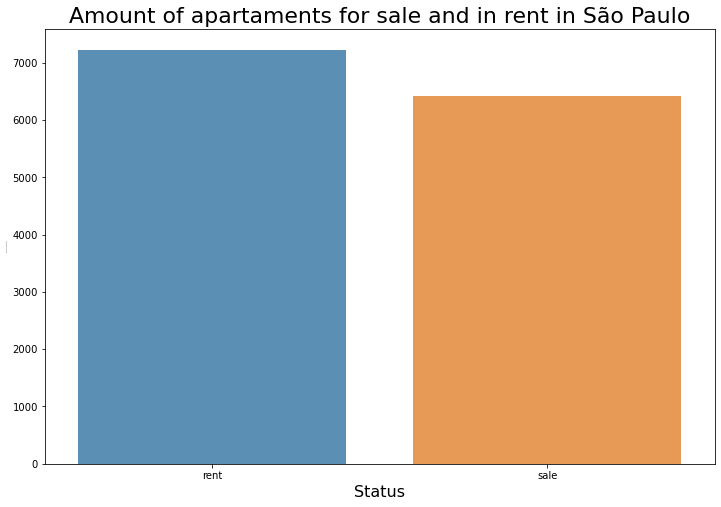

In [15]:
plt.figure(figsize = (12,8))
ax = sns.countplot(x = 'Negotiation Type', data = data, alpha = 0.8)
ax.set_title('Amount of apartaments for sale and in rent in São Paulo', fontsize = 22)
ax.set_ylabel('Number of apartments', fontsize = 1)
ax.set_xlabel('Status', fontsize = 16)

Second question, how's distribuited the apartaments in the districs  ?

In [16]:
data['District'].value_counts()

Moema              293
Mooca              288
Brás               255
Bela Vista         250
Brooklin           250
                  ... 
Jardim São Luis     44
São Rafael          44
Grajaú              37
São Domingos        35
Perus               30
Name: District, Length: 96, dtype: int64

We can see the we have 96 districts in São Paulo, and the top5 are Moema, Mooca, Brás, Bela Vista and Brooklin

Third question, how's our price is distribuited between for sale and rent

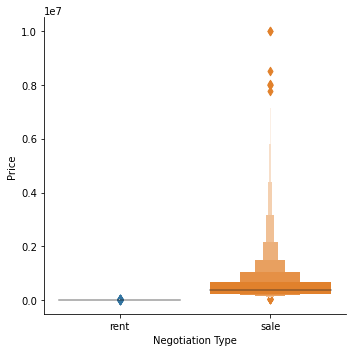

In [17]:
ax = sns.catplot(x = 'Negotiation Type', y = 'Price', kind = 'boxen',
                data = data)


Really weird this data, let's plot in a scatter plot some of these values

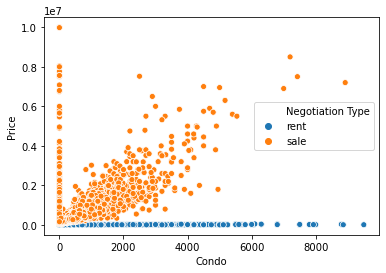

In [18]:
sns.scatterplot(x = 'Condo', y = 'Price', hue = 'Negotiation Type', data = data)

 The values for rent are with 0 prices, because they pay for Condo, instead of actually paying to buy the appartment

There is difference of price with apparamets with suites or no ?

<Figure size 864x576 with 0 Axes>

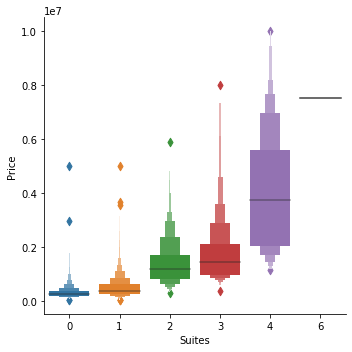

In [19]:
# Let's keep exploring out data
plt.figure(figsize = (12,8))
ax = sns.catplot(x = 'Suites', y = 'Price',data = data[data['Negotiation Type'] == 'sale'], kind = 'boxen');


Yes, for sure. As increase the number of suites in the appartment, grows it's price

Let's see how is related our variable size in our dataset

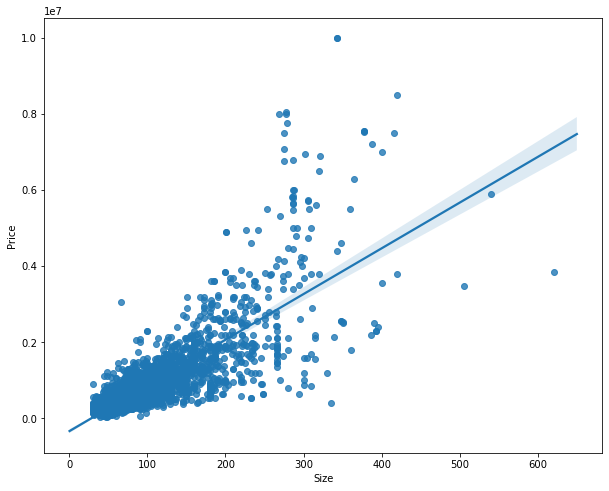

In [20]:
plt.figure(figsize = (10,8))
ax = sns.regplot(x = 'Size', y = 'Price', data = data[data['Negotiation Type'] == 'sale'])

We can visualize a positive relation between size and price. Let's visualize the condo for the rent appartments

Text(0.5, 0, 'Size')

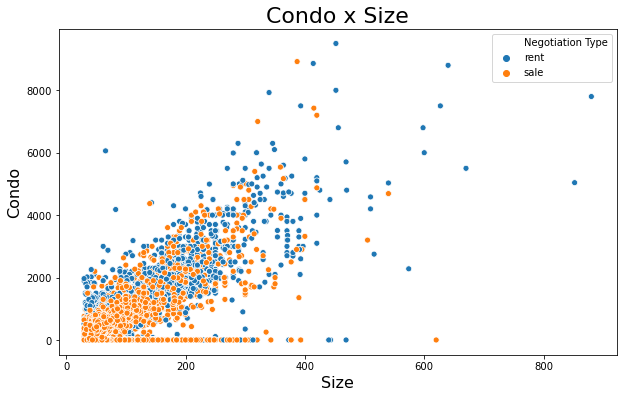

In [21]:
plt.figure(figsize = (10,6))
ax = sns.scatterplot(x = 'Size', y = 'Condo', hue = 'Negotiation Type', data = data)

ax.set_title('Condo x Size', fontsize = 22)
ax.set_ylabel('Condo', fontsize = 16)
ax.set_xlabel('Size', fontsize = 16)

If we want we can plot differently

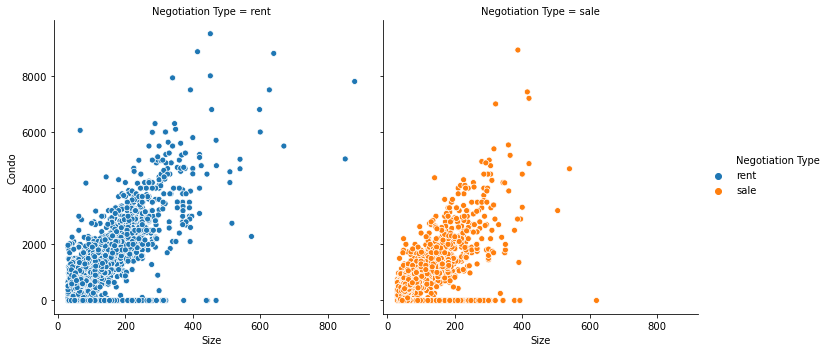

In [22]:
sns.relplot(x = 'Size', y = 'Condo', data = data, hue = 'Negotiation Type', col = 'Negotiation Type')

# I think the best situation we have is try an analysis differently for each type of negociation

In [87]:
data_rent = data[data['Negotiation Type'] == 'rent']
data_sale = data[data['Negotiation Type'] == 'sale']

## *Let's start the analysis for appartaments for sale*

Number of rooms inscrease the final price ?

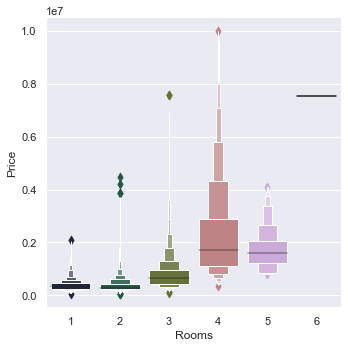

In [88]:
# Let's keep exploring out data
ax = sns.catplot(x = 'Rooms', y = 'Price',data = data_sale, kind = 'boxen',
            palette = 'cubehelix')

*We see that the price really increases when the appartment has more than 3 rooms apparently.*
*It's is not really good these analysis, because 4 rooms has a huge outlier and probably the y scale is not really realistic*
*But for what we can see, now, we can assume that*

And for toilets ? Maybe more than 2 toilets increases a lot ?

Text(0.5, 0, 'Size')

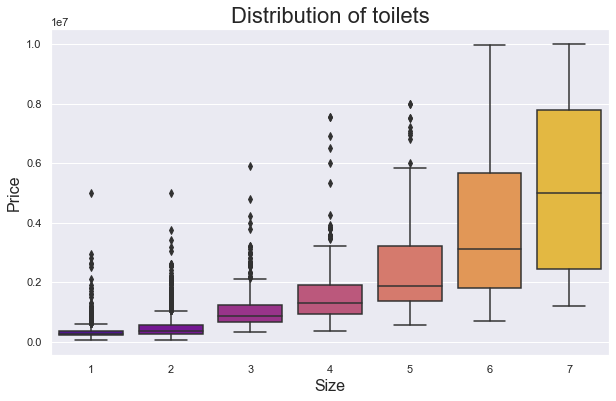

In [89]:
plt.figure(figsize =(10,6))
ax = sns.boxplot(x = 'Toilets', y = 'Price', data = data_sale,
                palette = 'plasma')

ax.set_title('Distribution of toilets', fontsize = 22)
ax.set_ylabel('Price', fontsize = 16)
ax.set_xlabel('Size', fontsize = 16)


Really there are appartaments with more than 5 toilets ? xD

Whats the average price for sale in each district ?

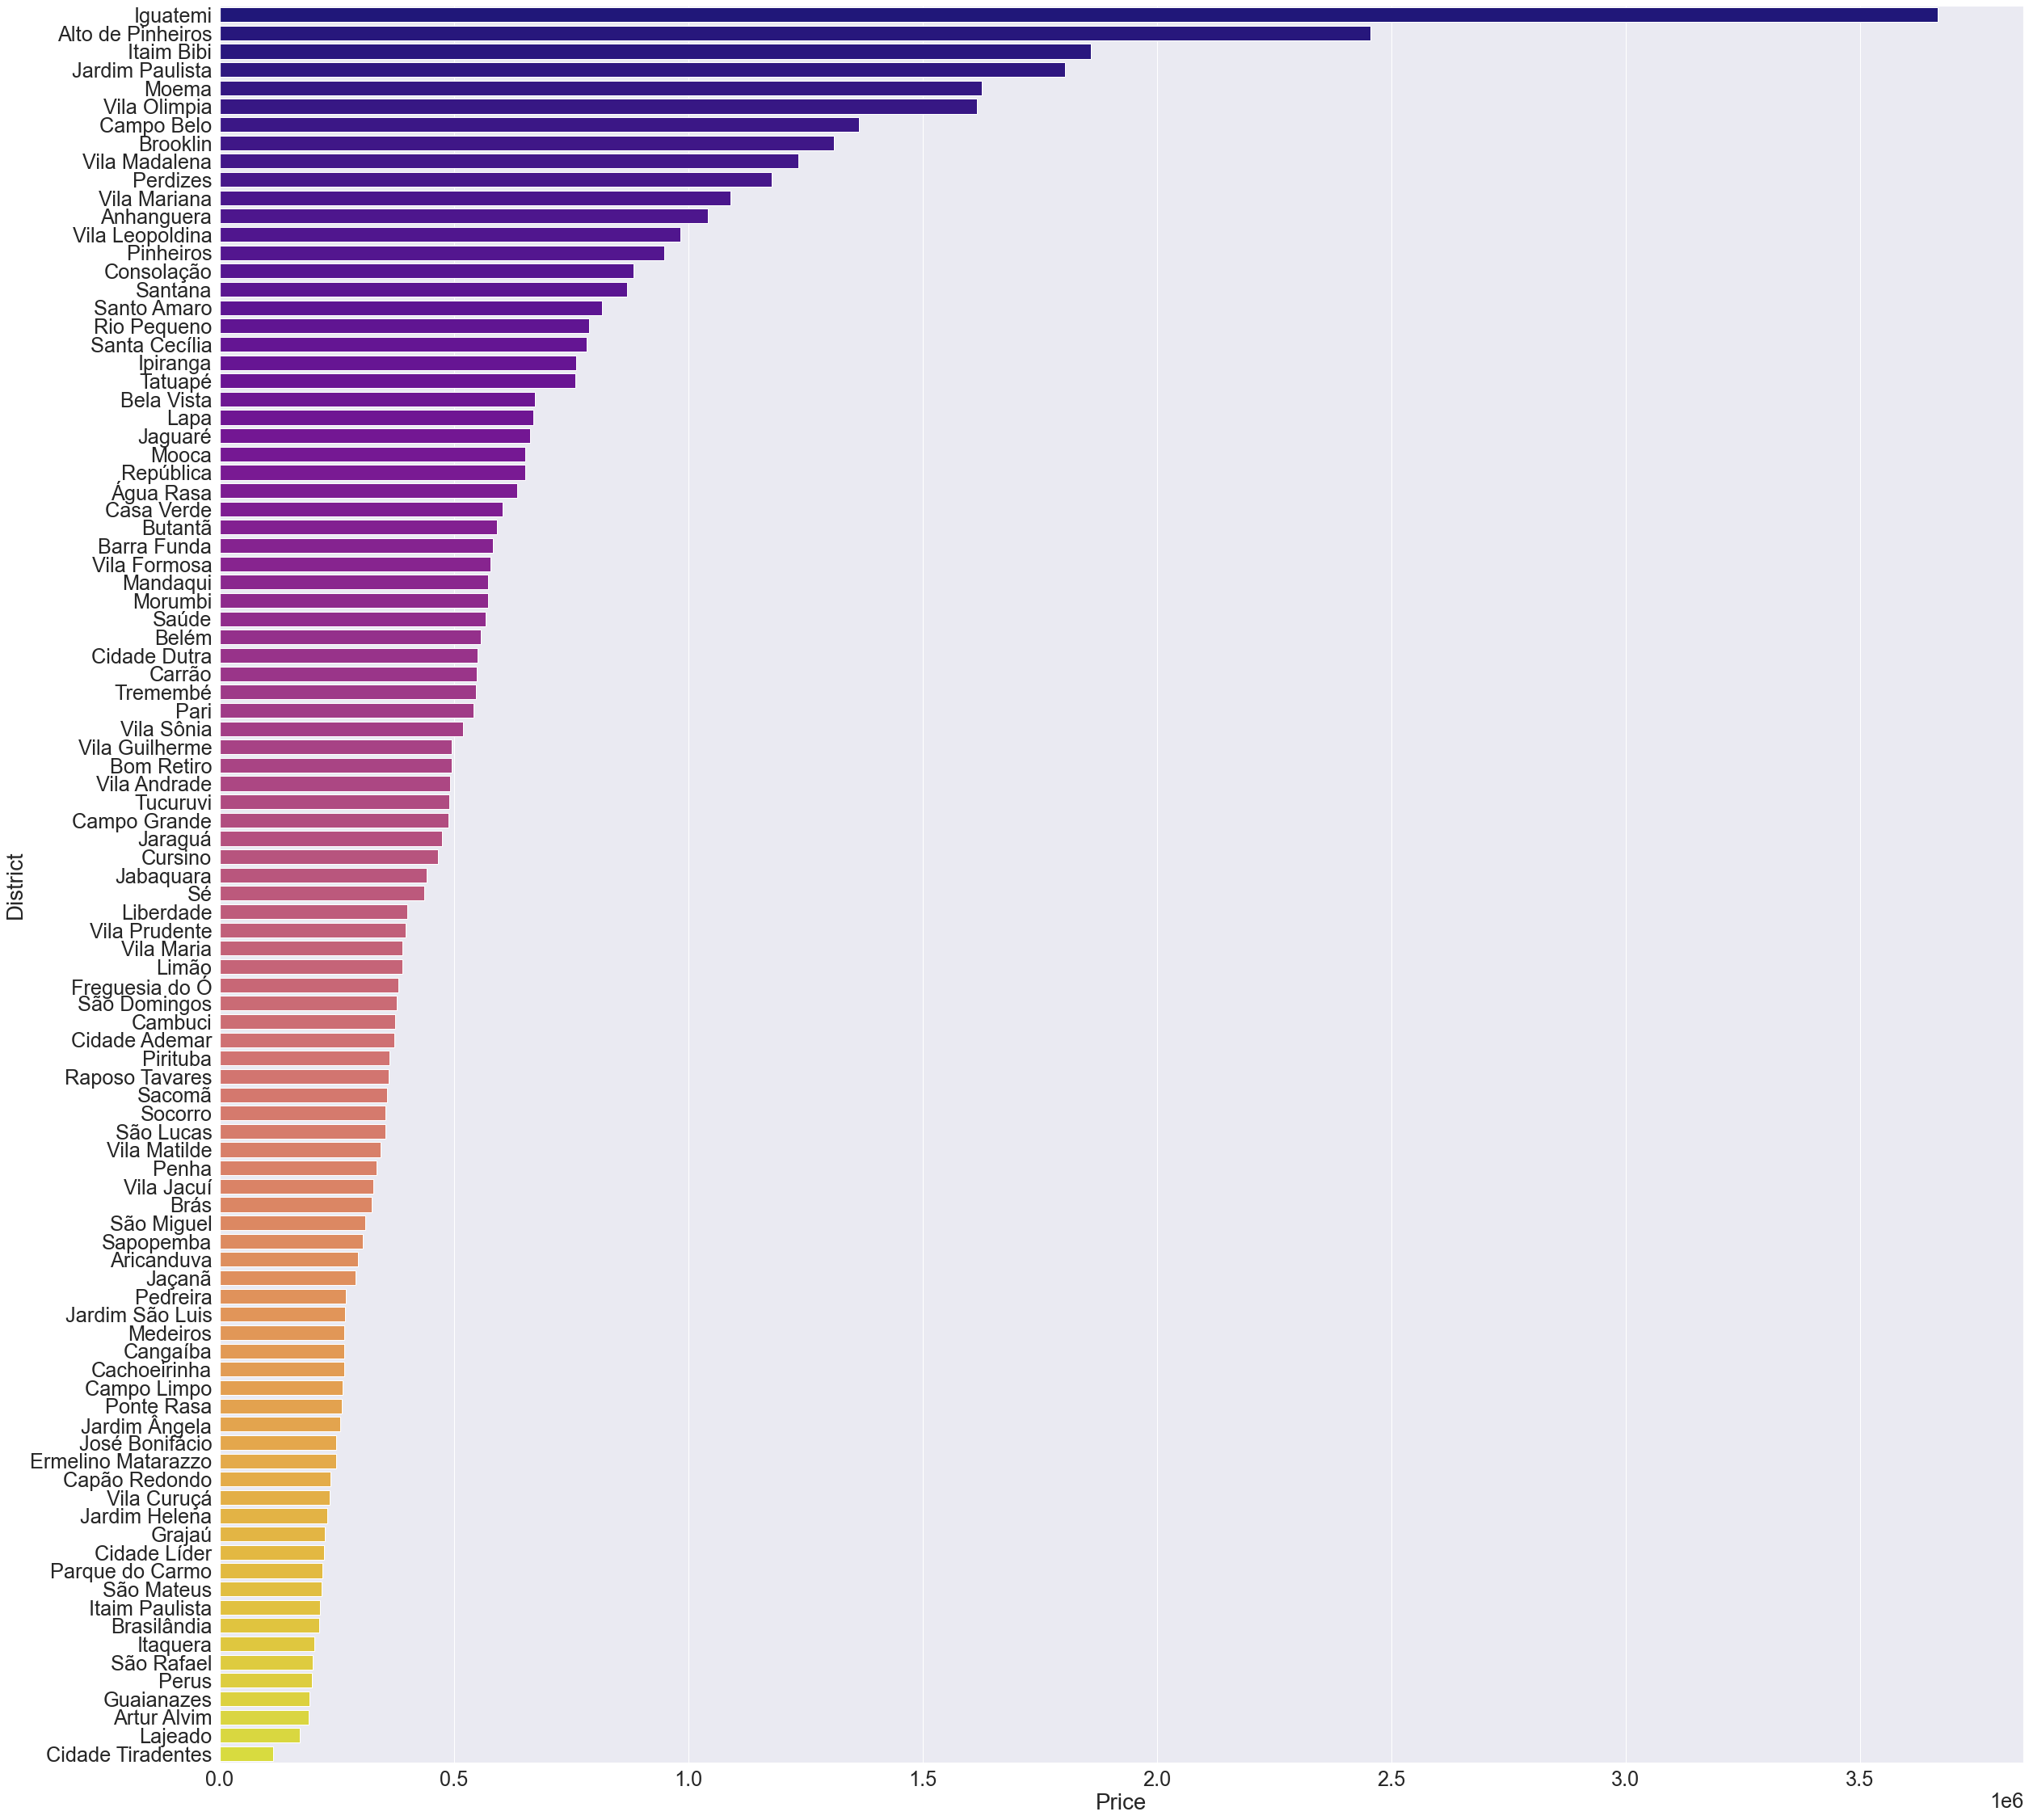

In [90]:
grouped = data_sale.groupby('District')['Price'].mean().reset_index()
grouped = grouped.sort_values(by = 'Price',ascending = False)
plt.figure(figsize = (40,40))
sns.set(font_scale = 2.3)
ax = sns.barplot(x='Price', y='District', data= grouped,palette = 'plasma')

In [91]:
sns.set(font_scale = 1)

## Now lets visualize the data in rent

In [92]:
data_rent.describe()

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,Latitude,Longitude
count,7228.000000,7228.000000,7228.000000,7228.000000,7228.000000,7228.000000,7228.000000,7228.000000,7228.000000,7228.000000,7228.000000,7228.000000,7228.000000
mean,3077.669065,825.194798,89.486165,2.304234,2.105562,1.024488,1.452269,0.299806,0.172939,0.487963,0.000830,-22.032278,-43.500873
std,3522.830284,835.621937,63.976416,0.829108,0.998162,0.884241,0.889535,0.458205,0.378220,0.499890,0.028802,5.962534,11.675070
min,480.000000,0.000000,30.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-46.749039,-58.364352
25%,1350.000000,395.750000,52.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-23.598066,-46.689788
50%,2000.000000,595.000000,67.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-23.555869,-46.644793
75%,3300.000000,990.000000,100.000000,3.000000,2.000000,1.000000,2.000000,1.000000,0.000000,1.000000,0.000000,-23.522756,-46.585110
max,50000.000000,9500.000000,880.000000,10.000000,8.000000,5.000000,9.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000


*Maybe the rent dataset is better than data_sale, we will keep our analysis with data_rent*

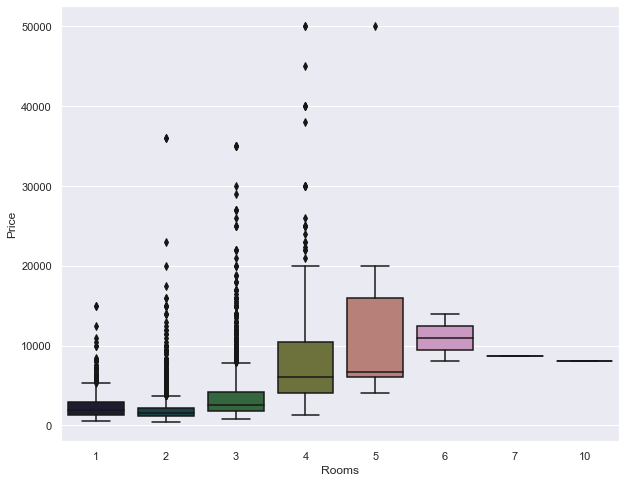

In [93]:
# Let's keep exploring out data
plt.figure(figsize =(10,8))
ax = sns.boxplot(x = 'Rooms', y = 'Price',data = data_rent,
            palette = 'cubehelix')

*The number of Suites inscreases the price ?*

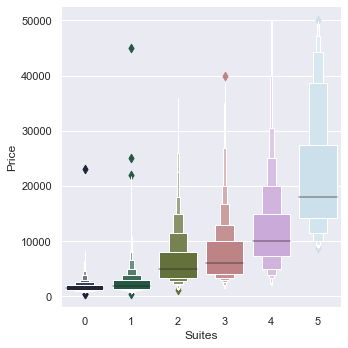

In [94]:
# Let's keep exploring out data
ax = sns.catplot(x = 'Suites', y = 'Price',data = data_rent, kind = 'boxen',
            palette = 'cubehelix')

The prices increase as the number of suites gets higher...

*Which district has higher mean price in São Paulo ?*

Text(0.5, 1.0, 'Mean Price per District')

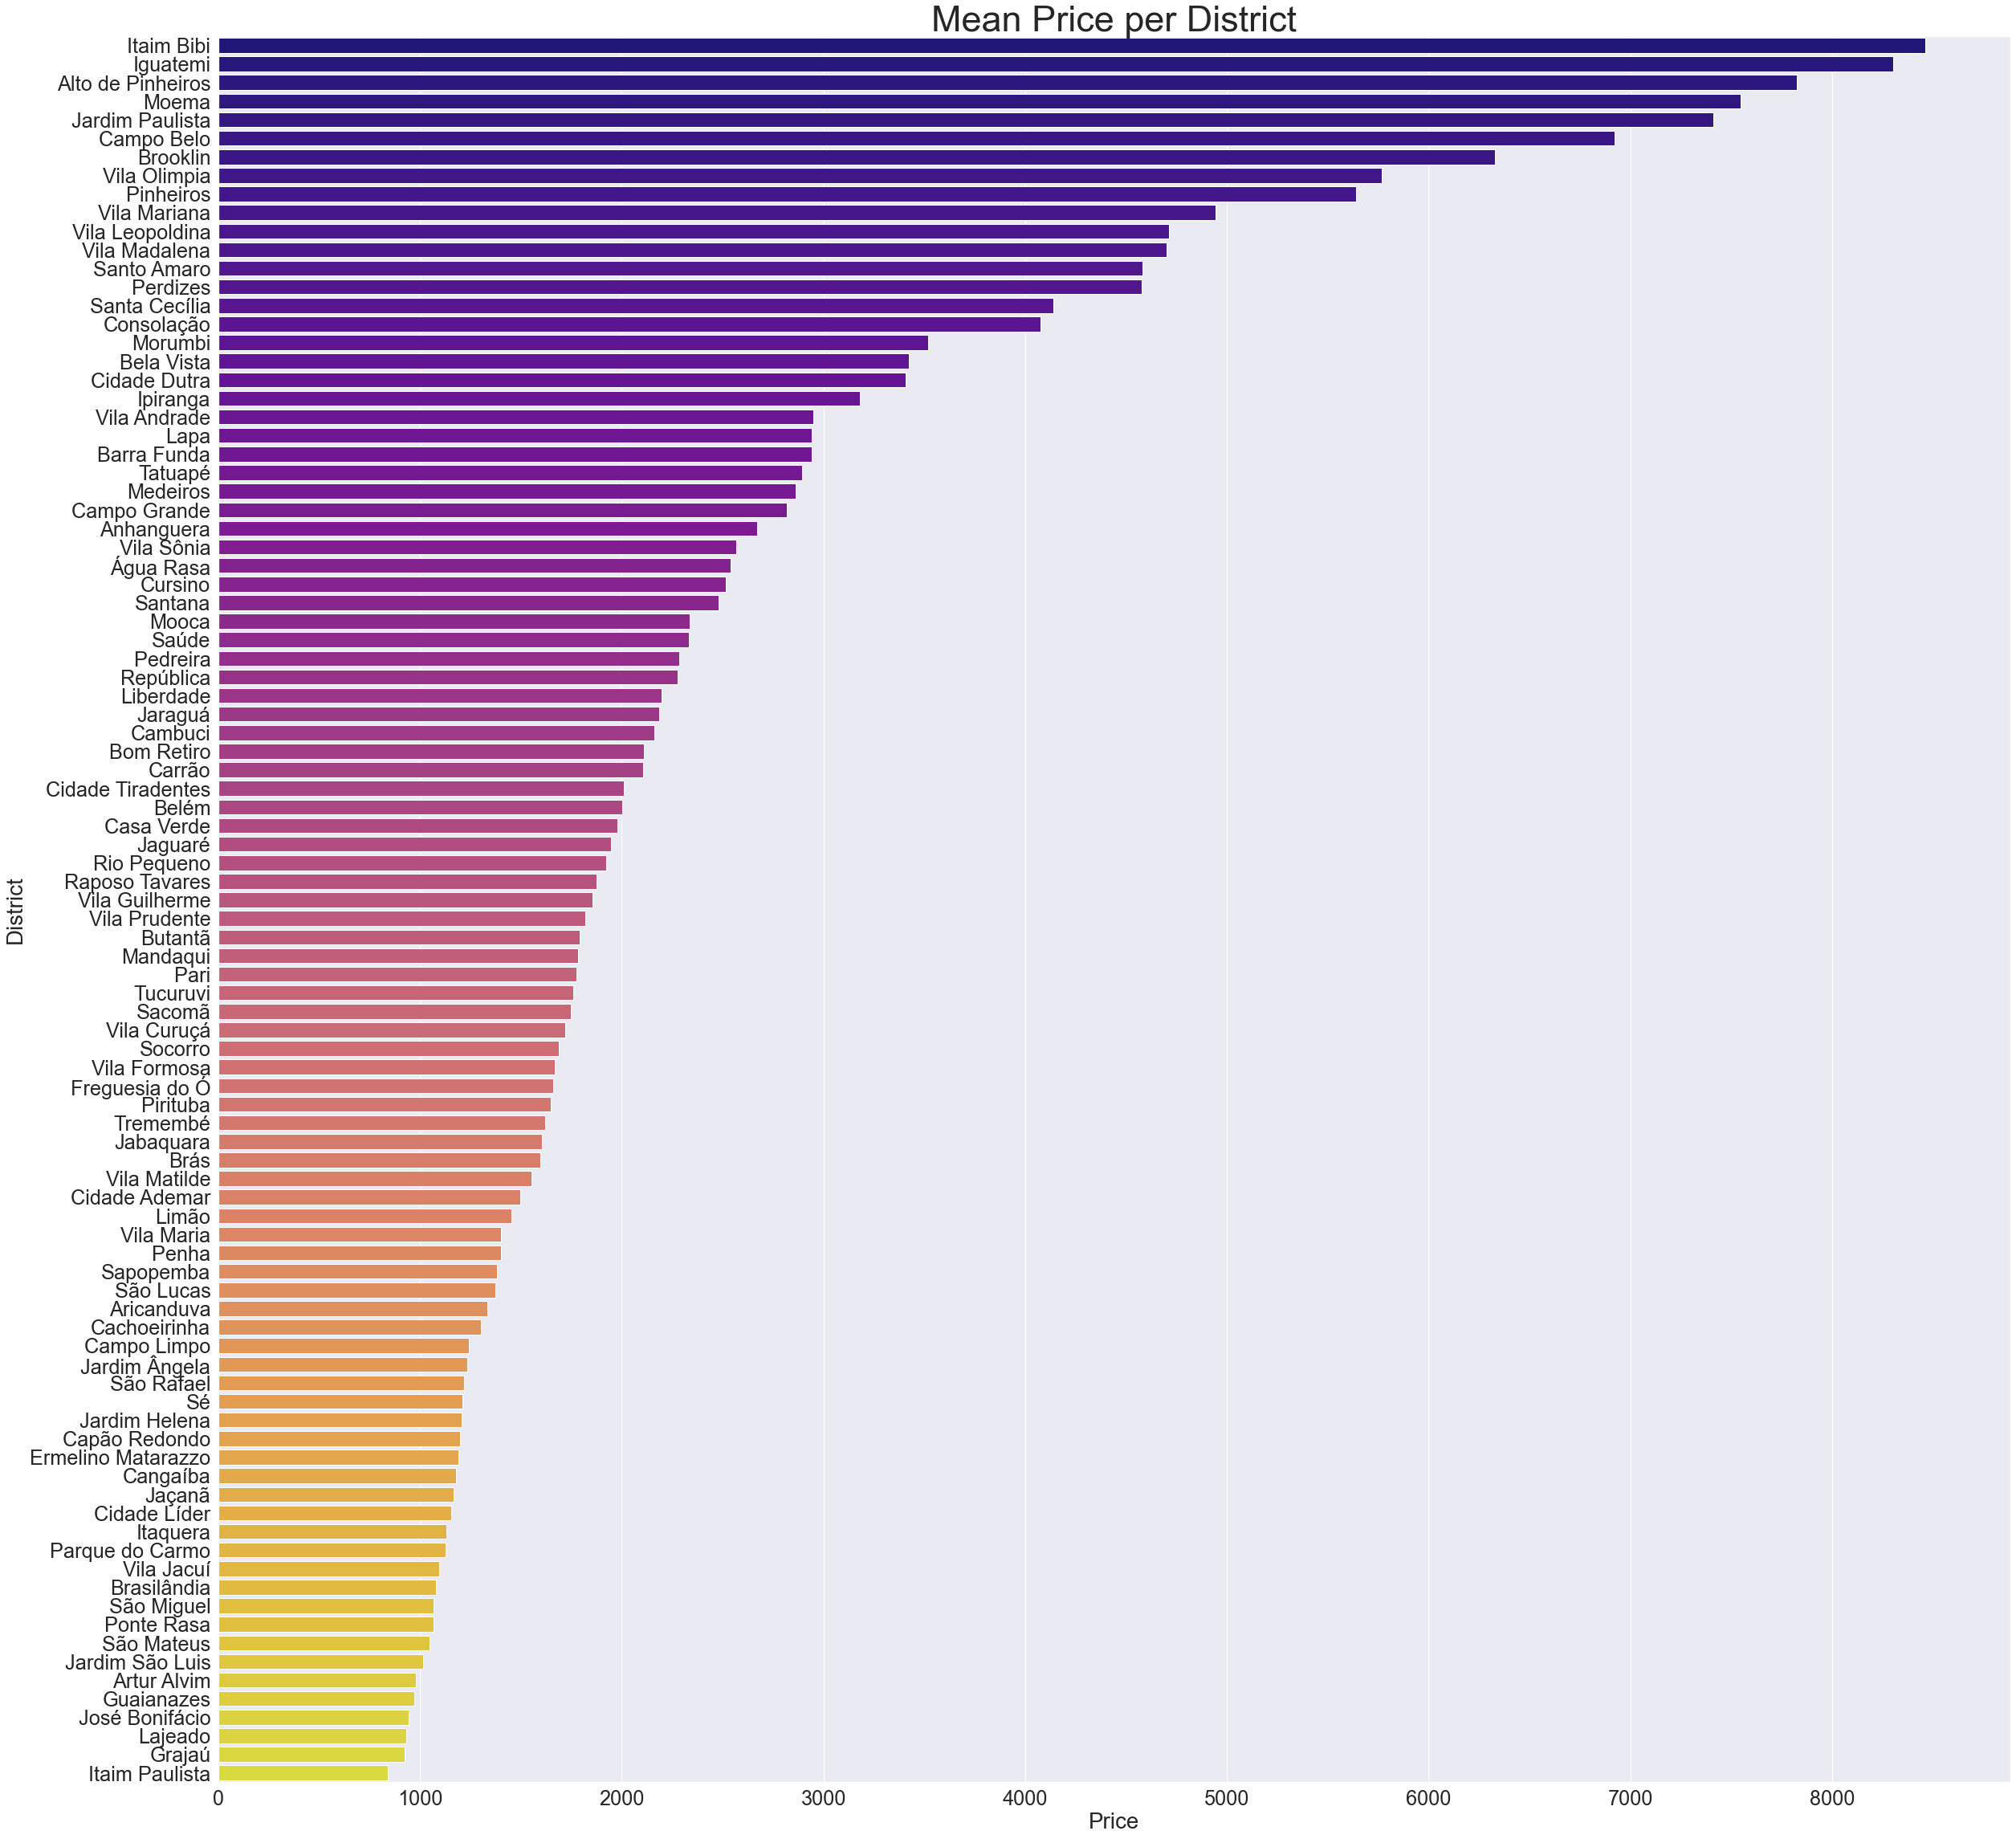

In [95]:
grouped = data_rent.groupby('District')['Price'].mean().reset_index()
grouped = grouped.sort_values(by = 'Price',ascending = False)
plt.figure(figsize = (40,40))
sns.set(font_scale = 2.3)
ax = sns.barplot(x='Price', y='District', data= grouped,
                palette = 'plasma')
ax.set_title('Mean Price per District', fontsize = 45)

*Itaim bibi, Iguatemi, Pinheiros and Moema they are the top4 in price rent in são paulo*

In [96]:
sns.set(font_scale = 1)

*Does number of parkings increases the price ?*

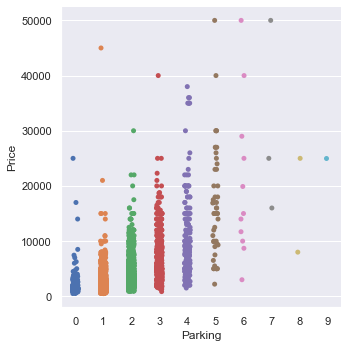

In [97]:
sns.catplot(x='Parking', y='Price', data=data_rent);

I guess furnished appartaments for sure has higher values, lets check this

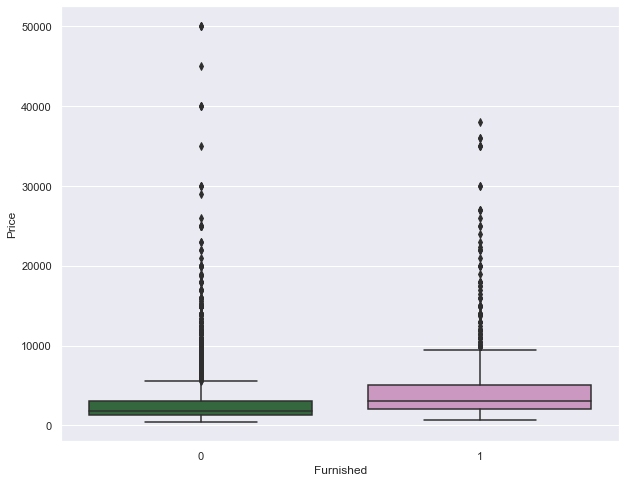

In [98]:
plt.figure(figsize =(10,8))
ax = sns.boxplot(x = 'Furnished', y = 'Price',data = data_rent,
            palette = 'cubehelix')

*We can't see the difference due the outliers from unfurnished appartaments, but is a slighty diference between the medians*

## From here i will digginf into our x , y variables

Checking the distribuition of price

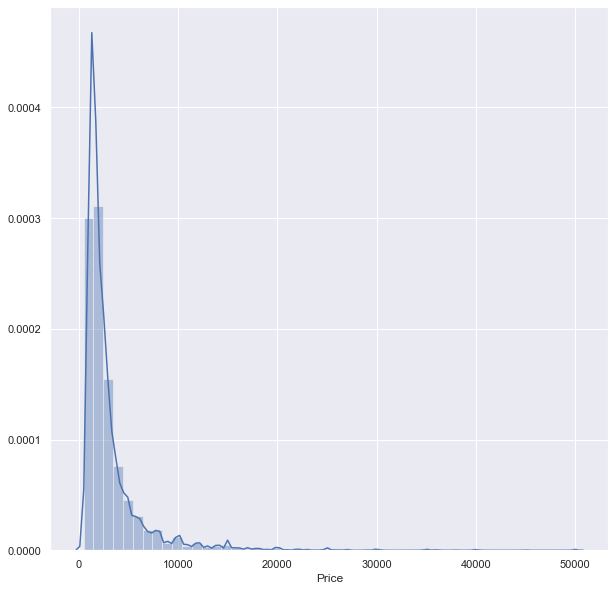

In [99]:
plt.figure(figsize=(10,10))
ax = sns.distplot(data_rent['Price'])

*The distribuition for our y is not a normal distribution*

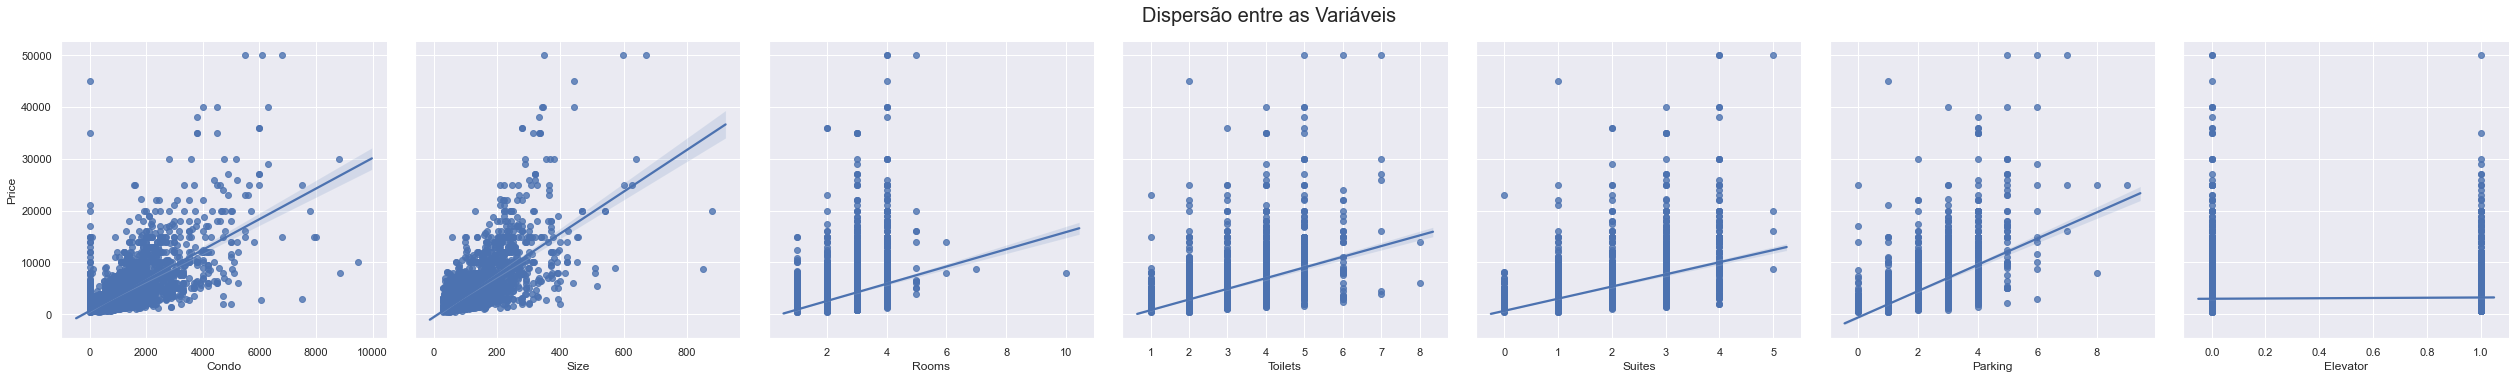

In [100]:
ax = sns.pairplot(data_rent, y_vars = 'Price', x_vars = ['Condo', 'Size', 'Rooms','Toilets','Suites','Parking','Elevator'], height = 5, kind = 'reg')
ax.fig.suptitle('Dispersão entre as Variáveis', fontsize=20, y=1.05)
ax

## Applying log values

In [101]:
data_rent['log_Price'] = np.log(data_rent['Price'])
data_rent['log_Condo'] = np.log(data_rent['Condo'])
data_rent['log_Size'] = np.log(data_rent['Size'])
data_rent['log_Furnished'] = np.log(data_rent['Furnished']+1)
data_rent['log_Swim'] = np.log(data_rent['Swimming Pool']+1)
data_rent['log_Elevator'] = np.log(data_rent['Elevator']+1)

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\user\Anaconda3\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: 

In [102]:
data_rent.head()

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,...,Negotiation Type,Property Type,Latitude,Longitude,log_Price,log_Condo,log_Size,log_Furnished,log_Swim,log_Elevator
0,930,220,47,2,2,1,1,0,0,0,...,rent,apartment,-23.543138,-46.479486,6.835185,5.393628,3.850148,0.0,0.0,0.000000
1,1000,148,45,2,2,1,1,0,0,0,...,rent,apartment,-23.550239,-46.480718,6.907755,4.997212,3.806662,0.0,0.0,0.000000
2,1000,100,48,2,2,1,1,0,0,0,...,rent,apartment,-23.542818,-46.485665,6.907755,4.605170,3.871201,0.0,0.0,0.000000
3,1000,200,48,2,2,1,1,0,0,0,...,rent,apartment,-23.547171,-46.483014,6.907755,5.298317,3.871201,0.0,0.0,0.000000
4,1300,410,55,2,2,1,1,1,0,0,...,rent,apartment,-23.525025,-46.482436,7.170120,6.016157,4.007333,0.0,0.0,0.693147


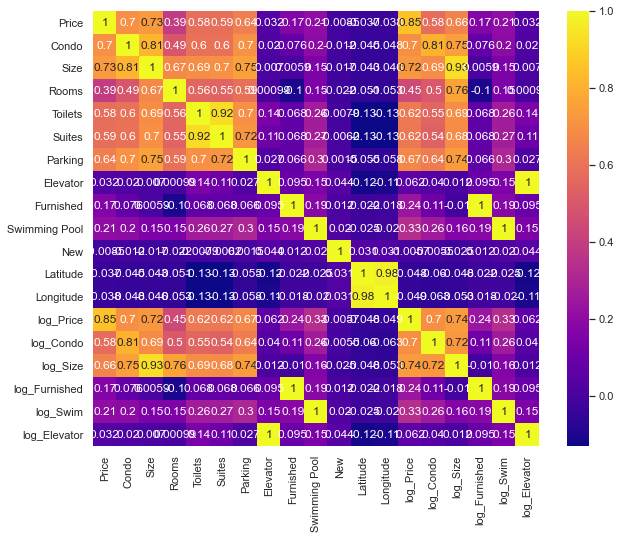

In [103]:
# correlation plot
plt.figure(figsize = (10,8))
corr = data_rent.corr()
sns.heatmap(corr, cmap = 'plasma', annot= True);


## Declaring x and y

In [125]:
y = data_rent['log_Price']

In [126]:
X = data_rent[['log_Size', 'log_Swim', 'log_Furnished']]

In [127]:
## Traint test split
from sklearn.model_selection import train_test_split

In [128]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

# Implementing linear regression

In [129]:
import statsmodels.api as sm

In [130]:
X_train_const = sm.add_constant(X_train)

In [131]:
X_train

,log_Size,log_Swim,log_Furnished
564,4.382027,0.000000,0.000000
1224,5.062595,0.693147,0.000000
142,4.007333,0.693147,0.000000
1490,4.007333,0.693147,0.693147
2404,4.219508,0.000000,0.693147
...,...,...,...
3772,5.407172,0.000000,0.693147
9087,4.219508,0.000000,0.000000
9122,4.700480,0.000000,0.000000
9286,5.799093,0.693147,0.693147


In [132]:
X_train_const

,const,log_Size,log_Swim,log_Furnished
564,1.0,4.382027,0.000000,0.000000
1224,1.0,5.062595,0.693147,0.000000
142,1.0,4.007333,0.693147,0.000000
1490,1.0,4.007333,0.693147,0.693147
2404,1.0,4.219508,0.000000,0.693147
...,...,...,...,...
3772,1.0,5.407172,0.000000,0.693147
9087,1.0,4.219508,0.000000,0.000000
9122,1.0,4.700480,0.000000,0.000000
9286,1.0,5.799093,0.693147,0.693147


In [133]:
model_statsmodels = sm.OLS(y_train,X_train_const, hasconst = True).fit()

In [134]:
model_statsmodels.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_Price   R-squared:                       0.632
Model:                            OLS   Adj. R-squared:                  0.632
Method:                 Least Squares   F-statistic:                     2892.
Date:                Fri, 29 May 2020   Prob (F-statistic):               0.00
Time:                        20:53:56   Log-Likelihood:                -2822.5
No. Observations:                5059   AIC:                             5653.
Df Residuals:                    5055   BIC:                             5679.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             3.4364      0.050     68.547      0.000       3.338       3.535
log_Size          0.9449      0.012     81.198      0.000       0.922       0.968
log_Swim          0.3647      0.018     20.588      0.000       0.330       0.399
log_Furnished     0.6003      0.023     25.647      0.000       0.554       0.646
==============================================================================
Omnibus:                      253.882   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              377.069
Skew:                           0.449   Prob(JB):                     1.32e-82
Kurtosis:                       3.991   Cond. No.                         38.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [135]:
print(model_statsmodels.summary())

                            OLS Regression Results                            
Dep. Variable:              log_Price   R-squared:                       0.632
Model:                            OLS   Adj. R-squared:                  0.632
Method:                 Least Squares   F-statistic:                     2892.
Date:                Fri, 29 May 2020   Prob (F-statistic):               0.00
Time:                        20:53:59   Log-Likelihood:                -2822.5
No. Observations:                5059   AIC:                             5653.
Df Residuals:                    5055   BIC:                             5679.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             3.4364      0.050     68.547

*Not the best R-Squared but ok.*

## Checking our model

In [139]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [140]:
model = LinearRegression()

In [142]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Getting our R²

In [143]:
model.score(X_train,y_train).round(3)

0.632

## Getting predictions

In [145]:
y_pred = model.predict(X_test)

## Getting R² from our y_pred

In [149]:
metrics.r2_score(y_test, y_pred).round(3)

0.638

## Interpreting our coeficient

In [150]:
model.intercept_

3.4364091472047917

In [151]:
model.coef_

array([0.94488653, 0.36473921, 0.60025717])

In [152]:
X_train.columns

Index(['log_Size', 'log_Swim', 'log_Furnished'], dtype='object')

In [156]:
index = ['Intercept','log_Size', 'log_Swim', 'log_Furnished']

In [158]:
pd.DataFrame(data= np.append(model.intercept_, model.coef_), index = index, columns = ['Parameters'])

,Parameters
Intercept,3.436409
log_Size,0.944887
log_Swim,0.364739
log_Furnished,0.600257


*Intercept - Excluding all effects from the variables log_size, log_swim and log_furnished, we the mean price of R$ 30*

*log_size = For every 1 % incresead in size we have an increase of 0.94% of the price*


*log_swim = For every 1 % incresead in size we have an increase of 0.36% of the price*


*log_Furnished = For every 1 % incresead in size we have an increase of 0.60% of the price*

## Making predictions with our X_train

In [165]:
y_pred_train = model.predict(X_train)

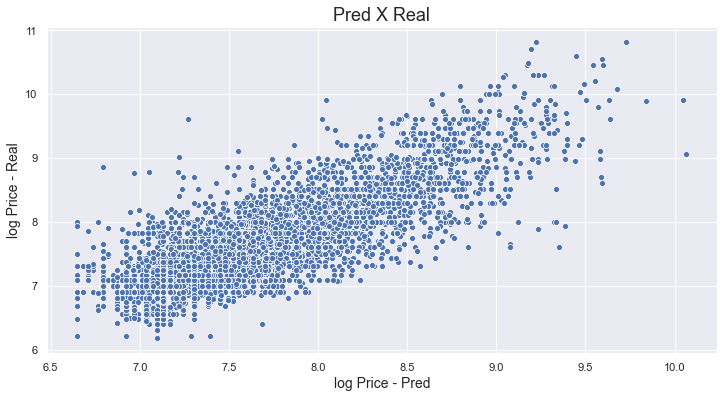

In [166]:
ax = sns.scatterplot(x = y_pred_train, y = y_train)
ax.figure.set_size_inches(12, 6)
ax.set_title('Pred X Real', fontsize=18)
ax.set_xlabel('log Price - Pred', fontsize=14)
ax.set_ylabel('log Price - Real', fontsize=14)
ax

In [167]:
## Getting residuals
resid = y_train - y_pred_train

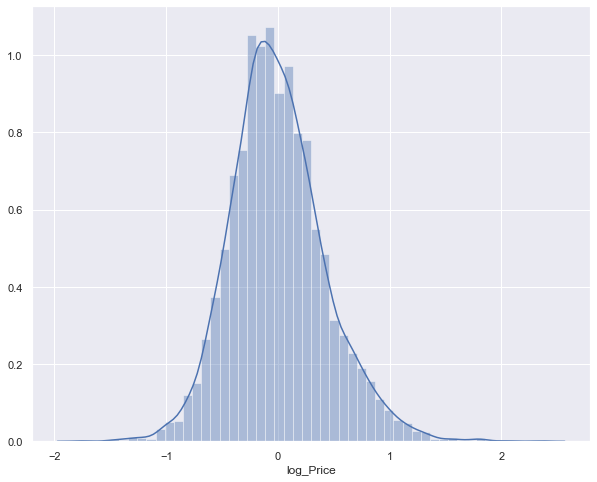

In [169]:
## Ploting the histogram of the residuals
plt.figure(figsize=(10,8))
sns.distplot(resid)
ax.figure.set_size_inches(20, 10)
ax.set_title('Histogram from our resid', fontsize=18)
ax.set_xlabel('log Price', fontsize=14)
ax